In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from Tracking.Notebooks.PostAnalysis.ThresholdFind_Support import threshold_plots

import os 
directory = '../Plots/WorkingPoint'
os.makedirs(directory,exist_ok=True)


In [2]:
data = pd.read_csv('./ThresholdsExtended.csv').dropna()

eval_seed_classifier = data[data['LonglivedThreshold']==0.0]
eval_downstream_classifier = data[data['HybridSeedingThreshold']==0.0]

In [3]:
eval_seed_classifier

,Threshold,HybridSeedingThreshold,LonglivedThreshold,TotalSeedTracks,TrueSeedTracks,SeedRatio,SeedGhostTracks,SeedGhostRatio,SeedPseudoEfficiency,SeedPseudoPurity,TotalDownstreamTracks,TrueDownstreamTracks,DownstreamRatio,DownstreamGhostTracks,DownstreamGhostRatio,DownstreamPseudoEfficiency,DownstreamPseudoPurity
0,"0.0,0.0",0.0,0.0,1576758,1376897,87.32,199861,12.68,100.000000,100.000000,1070438,774036,72.31,296402,27.69,100.000000,100.000000
7,"0.1,0.0",0.1,0.0,1397225,1356461,97.08,40764,2.92,98.515793,111.177279,1036899,764772,73.76,272127,26.24,98.803156,102.005255
14,"0.2,0.0",0.2,0.0,1361153,1337602,98.27,23551,1.73,97.146119,112.540082,1022292,754919,73.85,267373,26.15,97.530218,102.129719
21,"0.3,0.0",0.3,0.0,1338110,1322089,98.80,16021,1.20,96.019455,113.147045,1011328,747042,73.87,264286,26.13,96.512565,102.157378
28,"0.4,0.0",0.4,0.0,1320390,1308313,99.09,12077,0.91,95.018945,113.479157,1002133,740476,73.89,261657,26.11,95.664284,102.185037
35,"0.5,0.0",0.5,0.0,1303205,1293805,99.28,9400,0.72,93.965271,113.696748,992693,733544,73.89,259149,26.11,94.768719,102.185037
42,"0.6,0.0",0.6,0.0,1283746,1276397,99.43,7349,0.57,92.700979,113.868530,981230,725046,73.89,256184,26.11,93.670837,102.185037


In [4]:
eval_downstream_classifier

,Threshold,HybridSeedingThreshold,LonglivedThreshold,TotalSeedTracks,TrueSeedTracks,SeedRatio,SeedGhostTracks,SeedGhostRatio,SeedPseudoEfficiency,SeedPseudoPurity,TotalDownstreamTracks,TrueDownstreamTracks,DownstreamRatio,DownstreamGhostTracks,DownstreamGhostRatio,DownstreamPseudoEfficiency,DownstreamPseudoPurity
0,"0.0,0.0",0.0,0.0,1576758,1376897,87.32,199861,12.68,100.0,100.0,1070438,774036,72.31,296402,27.69,100.000000,100.000000
1,"0.0,0.1",0.0,0.1,1576758,1376897,87.32,199861,12.68,100.0,100.0,904910,763826,84.41,141084,15.59,98.680940,116.733509
2,"0.0,0.2",0.0,0.2,1576758,1376897,87.32,199861,12.68,100.0,100.0,860743,753792,87.57,106951,12.43,97.384618,121.103582
3,"0.0,0.3",0.0,0.3,1576758,1376897,87.32,199861,12.68,100.0,100.0,827112,742315,89.75,84797,10.25,95.901870,124.118379
4,"0.0,0.4",0.0,0.4,1576758,1376897,87.32,199861,12.68,100.0,100.0,795225,727147,91.44,68078,8.56,93.942271,126.455539
5,"0.0,0.5",0.0,0.5,1576758,1376897,87.32,199861,12.68,100.0,100.0,758862,704969,92.90,53893,7.10,91.077030,128.474623
6,"0.0,0.6",0.0,0.6,1576758,1376897,87.32,199861,12.68,100.0,100.0,708640,667881,94.25,40759,5.75,86.285522,130.341585


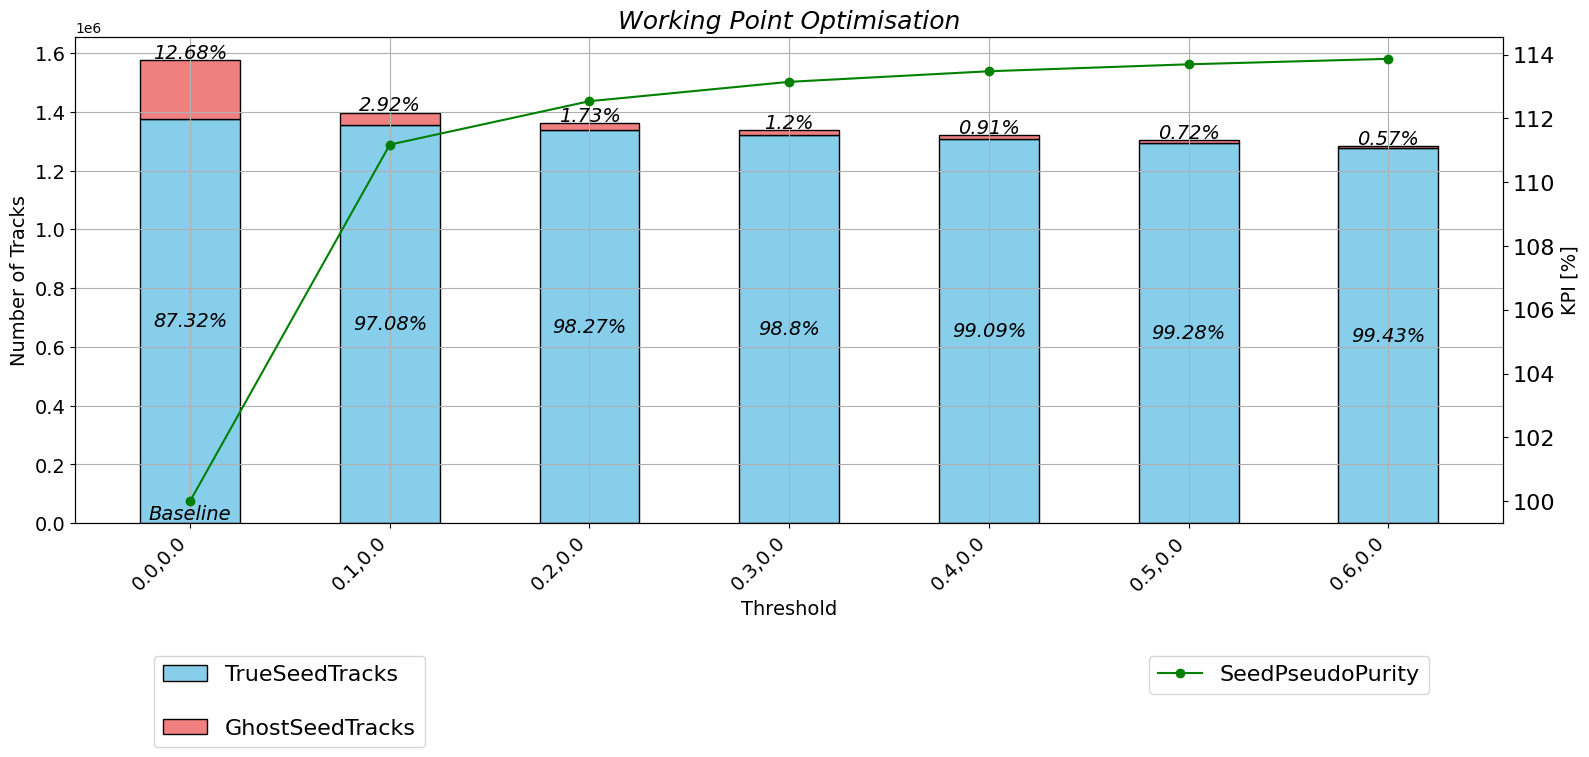

In [5]:
threshold_plots(data_for_plot = eval_seed_classifier,track_type='Seed',bar_width=0.5,directory=directory,plot_name='SeedClassifier')

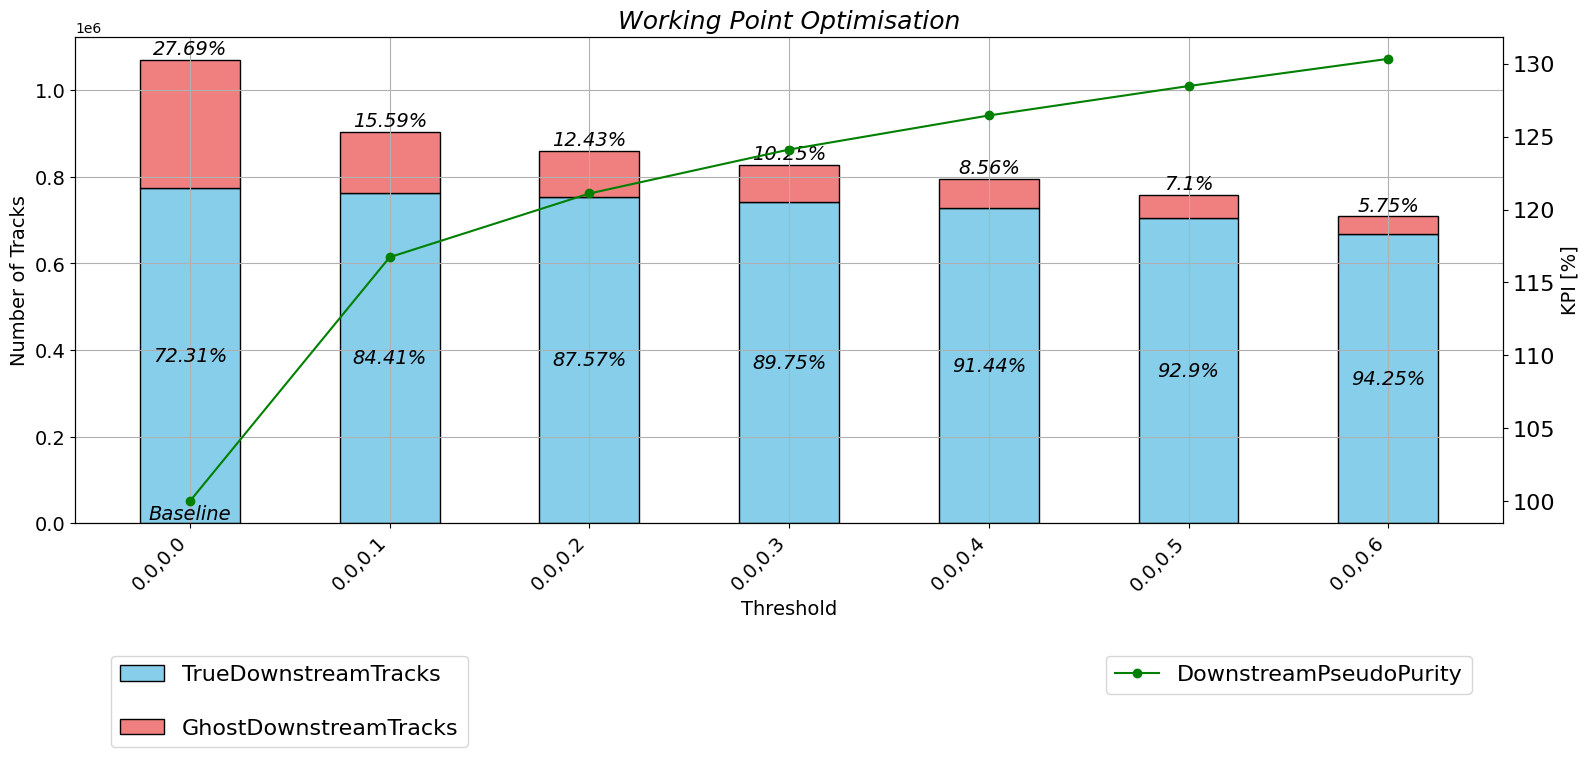

In [6]:
threshold_plots(data_for_plot = eval_downstream_classifier,track_type='Downstream',bar_width=0.5,directory=directory,plot_name='DownstreamClassifier')

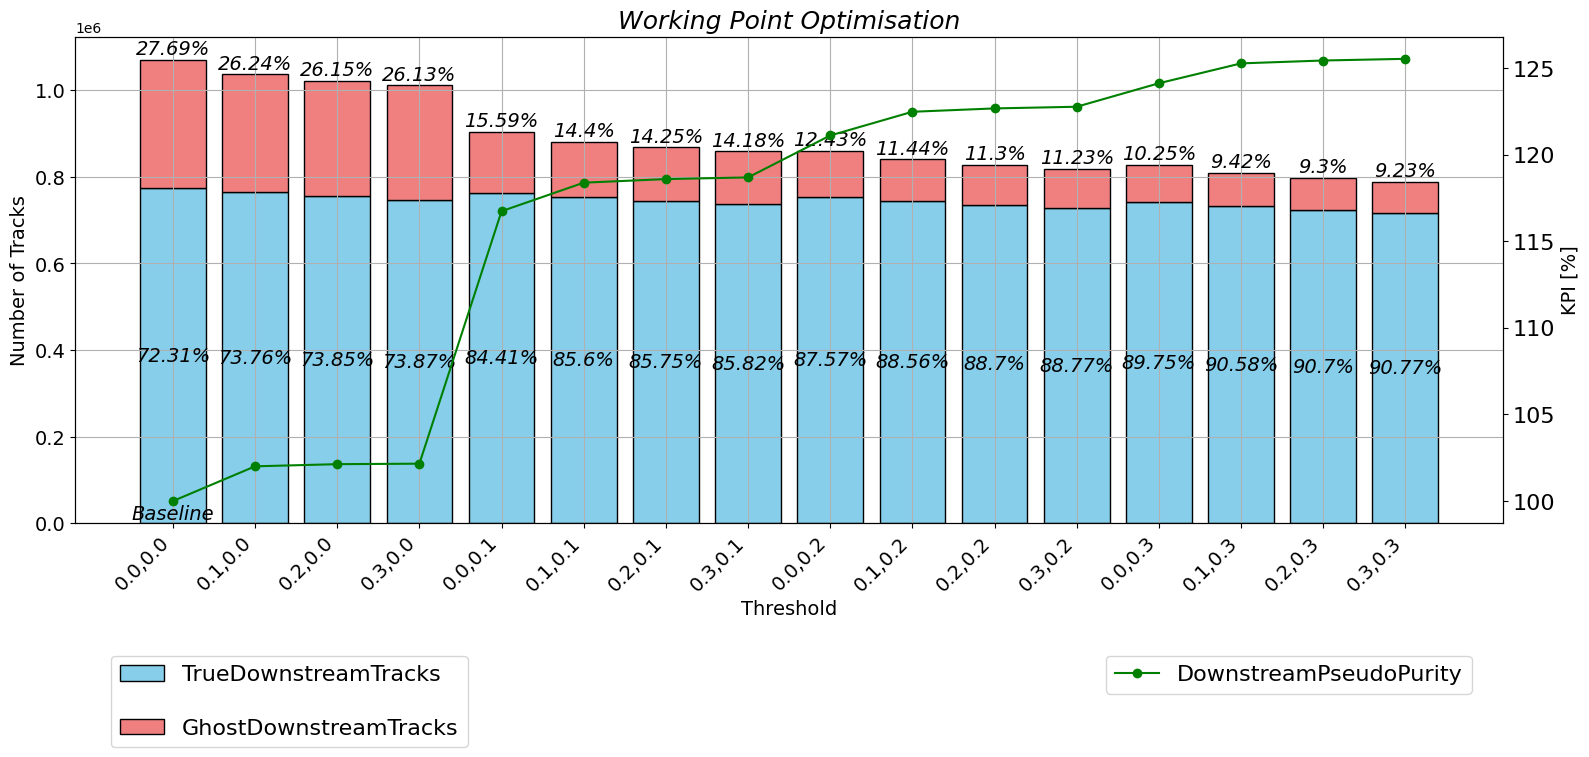

In [7]:
temp_ = data[data['HybridSeedingThreshold'].isin([0.0,0.1,0.2,0.3]) & data['LonglivedThreshold'].isin([0.0,0.1,0.2,0.3])].sort_values(by='DownstreamPseudoPurity')

threshold_plots(data_for_plot = temp_,track_type='Downstream',bar_width=0.8,directory=directory,plot_name='CombinedClassifier')